# Clase 15 - Introducción al análisis predictivo con Regresión
### Coderhouse - Data Science
Profe Jorge Ruiz

REGRESIÓN LINEAL SIMPLE

In [157]:
#Importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [158]:
#Importar los datos
df = pd.read_csv("Encuesta.csv", sep = ";", encoding='iso-8859-1')

In [159]:
#Vemos el dataset
df

,First name (Optionall),Years,Country,language Programming,Other Technology,Area dedicated,Age of experience,Salary(ARS)
0,Nicolas,24,Argentina,Python,NaN,Data Scientist,1.0,280000.0
1,Tomás,26,Argentina,NaN,Java,Data Scientist,NaN,575000.0
2,Matías,26,Argentina,Python,NaN,Data Scientist,0.3,165000.0
3,Nathaly,20,Argentina,Java,NaN,Back-end and Front-end,0.0,250000.0
4,Sofía,24,Argentina,Java,NaN,Back-end and Front-end,0.5,175000.0
5,Alberto,22,Argentina,Javascript,Php,Back-end and Front-end,0.6,200000.0
6,Cristian,21,Argentina,Javasript,NaN,Back-end and Front-end,0.8,NaN
7,Cristian,18,Argentina,Database,Java,Back-end and Front-end,2.0,600000.0
8,Victoria,25,Argentina,Javascript,Php,Back-end and Front-end,0.9,225000.0
9,Lucía,22,Argentina,Javascript,Back-end,Back-end and Front-end,1.7,425000.0


In [160]:
df.columns

Index(['First name (Optionall)', 'Years', 'Country', 'language Programming ',
       'Other Technology', 'Area dedicated', 'Age of experience',
       'Salary(ARS)'],
      dtype='object')

In [161]:
#https://www.w3schools.com/python/ref_string_strip.asp
# strip: este método elimina los espacios en blanco al inicio y final de cada elemento.

columnas=df.columns

for columna in columnas:
    sin_espacio=columna.strip()

    if sin_espacio!=columna:
        print(columna)


language Programming 


In [162]:
columnas=df.columns

for columna in columnas:
    sin_espacio=columna.strip()

    if sin_espacio!=columna:
        df= df.rename(columns={columna: sin_espacio})


In [163]:
#df = df.rename(columns={"language Programming ": "language Programming"})


In [ ]:
# el camino más simple
# df.columns = df.columns.str.strip()

In [164]:
#Shape
df.shape

(56, 8)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   First name (Optionall)  56 non-null     object 
 1   Years                   56 non-null     int64  
 2   Country                 56 non-null     object 
 3   language Programming    55 non-null     object 
 4   Other Technology        35 non-null     object 
 5   Area dedicated          56 non-null     object 
 6   Age of experience       54 non-null     float64
 7   Salary(ARS)             54 non-null     float64
dtypes: float64(2), int64(1), object(5)
memory usage: 3.6+ KB


In [166]:
df[df['Age of experience'].isnull()]

,First name (Optionall),Years,Country,language Programming,Other Technology,Area dedicated,Age of experience,Salary(ARS)
1,Tomás,26,Argentina,NaN,Java,Data Scientist,NaN,575000.0
53,Ariel,26,Argentina,Python,C++,web developer,NaN,275000.0


In [167]:
df[df['Salary(ARS)'].isnull()]

,First name (Optionall),Years,Country,language Programming,Other Technology,Area dedicated,Age of experience,Salary(ARS)
6,Cristian,21,Argentina,Javasript,NaN,Back-end and Front-end,0.8,NaN
48,Diego,21,Argentina,Js,NaN,Front-end,1.2,NaN


In [168]:
df["Country"]= df.Country.astype("category")
df["language Programming"]= df["language Programming"].astype("category")
df["Other Technology"]= df["Other Technology"].astype("category")
df["Area dedicated"]=df["Area dedicated"].astype("category")

In [169]:
#Analisis estadistico basico
df.describe()

,Years,Age of experience,Salary(ARS)
count,56.000000,54.000000,54.000000
mean,23.517857,1.257407,321111.111111
std,2.558345,0.786586,149769.214494
min,18.000000,0.000000,150000.000000
25%,21.750000,0.625000,192500.000000
50%,23.000000,1.050000,275000.000000
75%,25.250000,1.700000,425000.000000
max,30.000000,3.500000,625000.000000


In [170]:
df.describe(include="category")

,Country,language Programming,Other Technology,Area dedicated
count,56,55,35,56
unique,1,9,11,8
top,Argentina,SQL,Java,DBA
freq,56,18,8,18


In [171]:
df.isnull().sum().sort_values(ascending=False)

Other Technology          21
Age of experience          2
Salary(ARS)                2
language Programming       1
First name (Optionall)     0
Years                      0
Country                    0
Area dedicated             0
dtype: int64

c:\Users\ruiz7\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


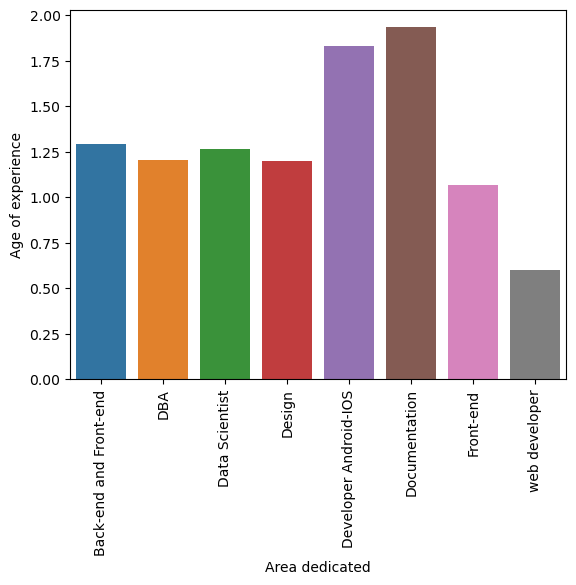

In [172]:
ax=sns.barplot(x="Area dedicated", y='Age of experience', data=df, errorbar=None)

# Rotar los nombres del eje x y mostrarlos en vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

c:\Users\ruiz7\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


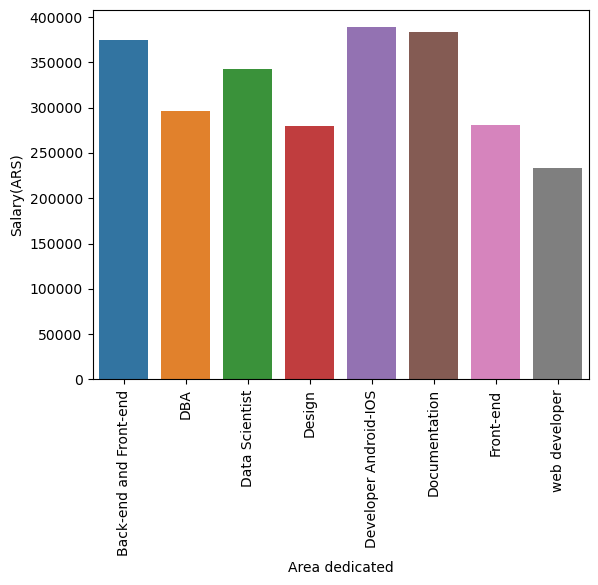

In [173]:
ax=sns.barplot(x="Area dedicated", y='Salary(ARS)', data=df, errorbar=None)

# Rotar los nombres del eje x y mostrarlos en vertical
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

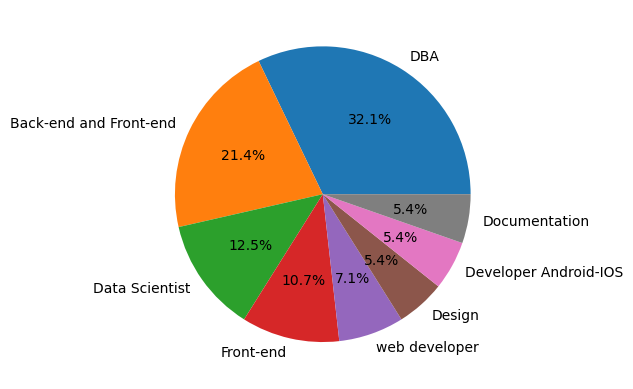

In [174]:
# Contar el número de observaciones en cada categoría de "Area dedicated"
counts = df['Area dedicated'].value_counts()

# Crear el gráfico circular (pie plot)
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

plt.show()

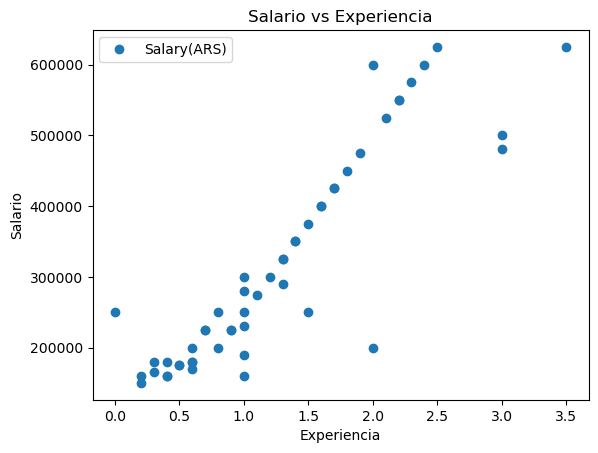

In [175]:
#Ploteamos el dataset
df.plot(x='Age of experience', y='Salary(ARS)', style="o")
plt.title('Salario vs Experiencia')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()

<Axes: >

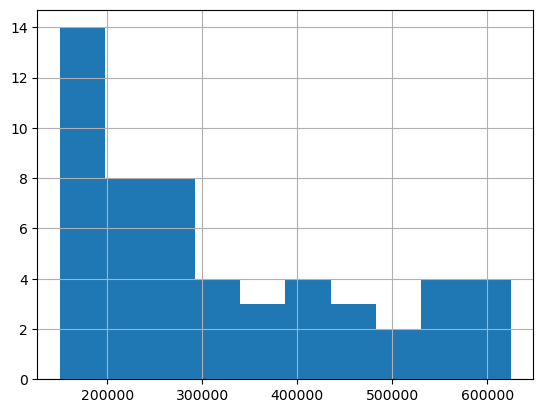

In [176]:
df["Salary(ARS)"].hist()

<Axes: >

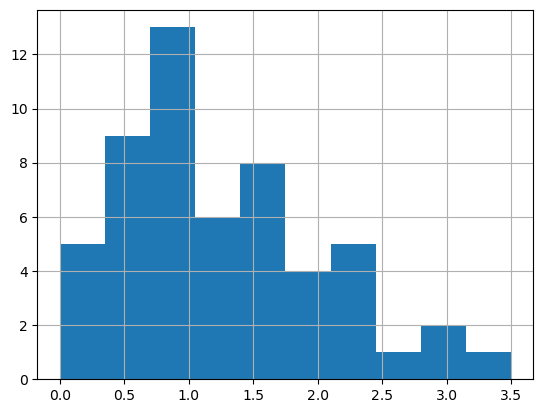

In [177]:
df['Age of experience'].hist()

In [178]:
df2=df.groupby(['Area dedicated'])[['Age of experience', 'Salary(ARS)']].median().reset_index()
# Convertir la mediana a enteros
df2[['Age of experience', 'Salary(ARS)']] = df2[['Age of experience', 'Salary(ARS)']].astype(int)
df2

#df.groupby('Area dedicated').agg({'Salary(ARS)': 'mean', 'Age of experience': 'median'}).reset_index()
#recomendable usar esto cuando queremos calcular diferentes estadisticos a las columnas

C:\Users\ruiz7\AppData\Local\Temp\ipykernel_4340\906452152.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2=df.groupby(['Area dedicated'])[['Age of experience', 'Salary(ARS)']].median().reset_index()


,Area dedicated,Age of experience,Salary(ARS)
0,Back-end and Front-end,1,400000
1,DBA,1,240000
2,Data Scientist,1,300000
3,Design,1,300000
4,Developer Android-IOS,2,480000
5,Documentation,2,400000
6,Front-end,1,225000
7,web developer,0,217500


In [179]:
df.columns

Index(['First name (Optionall)', 'Years', 'Country', 'language Programming',
       'Other Technology', 'Area dedicated', 'Age of experience',
       'Salary(ARS)'],
      dtype='object')

In [180]:
df.iloc[6]

First name (Optionall)                  Cristian
Years                                         21
Country                                Argentina
language Programming                   Javasript
Other Technology                             NaN
Area dedicated            Back-end and Front-end
Age of experience                            0.8
Salary(ARS)                                  NaN
Name: 6, dtype: object

In [181]:
df.iloc[48]

First name (Optionall)        Diego
Years                            21
Country                   Argentina
language Programming             Js
Other Technology                NaN
Area dedicated            Front-end
Age of experience               1.2
Salary(ARS)                     NaN
Name: 48, dtype: object

In [182]:
# es una buena estrategia pero es un uso más avanzado 
"""
# Crear un diccionario de mapeo de los valores de df2
mapping_dict = df2.set_index('Area dedicated')['Salary(ARS)'].to_dict()

# Mapear los valores de df['Area dedicated'] a los valores correspondientes de df2['Salary(ARS)']
df['Filled Salary'] = df['Area dedicated'].map(mapping_dict)
df
"""


"\n# Crear un diccionario de mapeo de los valores de df2\nmapping_dict = df2.set_index('Area dedicated')['Salary(ARS)'].to_dict()\n\n# Mapear los valores de df['Area dedicated'] a los valores correspondientes de df2['Salary(ARS)']\ndf['Filled Salary'] = df['Area dedicated'].map(mapping_dict)\ndf\n"

In [183]:
# un camino muy usado, pero no es el mejor

df['Age of experience']=df['Age of experience'].fillna(df['Age of experience'].median())
df['Salary(ARS)']=df['Salary(ARS)'].fillna(df['Salary(ARS)'].median())
df.isnull().sum().sort_values(ascending=False)

Other Technology          21
language Programming       1
First name (Optionall)     0
Years                      0
Country                    0
Area dedicated             0
Age of experience          0
Salary(ARS)                0
dtype: int64

In [184]:
df['language Programming']=df['language Programming'].fillna(df['language Programming'].mode()[0])
df.isnull().sum().sort_values(ascending=False)

Other Technology          21
First name (Optionall)     0
Years                      0
Country                    0
language Programming       0
Area dedicated             0
Age of experience          0
Salary(ARS)                0
dtype: int64

In [185]:
df['language Programming'].unique()

['Python', 'SQL', 'Java', 'Javascript', 'Javasript', 'Database', 'Javascrip', 'Js', 'java']
Categories (9, object): ['Database', 'Java', 'Javascrip', 'Javascript', ..., 'Js', 'Python', 'SQL', 'java']

In [186]:
df['language Programming'] = df['language Programming'].replace(['Java', 'java'], 'JAVA')
df['language Programming'].unique()


['Python', 'SQL', 'JAVA', 'Javascript', 'Javasript', 'Database', 'Javascrip', 'Js']
Categories (8, object): ['Database', 'JAVA', 'Javascrip', 'Javascript', 'Javasript', 'Js', 'Python', 'SQL']

In [187]:
# Calcular el coeficiente de correlación entre X e Y
corr_coeff =df['Age of experience'].corr(df['Salary(ARS)'], method='pearson')

# Imprimir el coeficiente de correlación

print("Coeficiente de correlación de Pearson: ", corr_coeff)


Coeficiente de correlación de Pearson:  0.856380403669907


In [188]:

# Definir una función sin relación lineal
def sin_relacion(m):
    n = np.sin(m)
    return n

# Generar valores de x
m = np.linspace(-10, 10, 101)

# Calcular valores de y utilizando la función sin relación lineal
n = sin_relacion(m)

# Crear DataFrame con x e y
df2 = pd.DataFrame({'X': m, 'Y': n})

df2

,X,Y
0,-10.0,0.544021
1,-9.8,0.366479
2,-9.6,0.174327
3,-9.4,-0.024775
4,-9.2,-0.222890
...,...,...
96,9.2,0.222890
97,9.4,0.024775
98,9.6,-0.174327
99,9.8,-0.366479


Coeficiente de correlación de Pearson: 0.1790546104077747


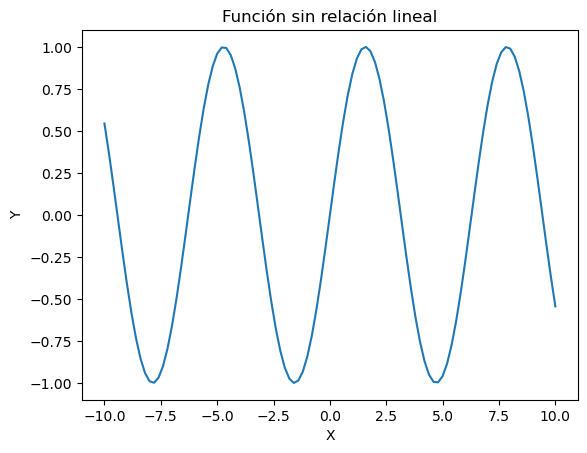

In [189]:
# Calcular coeficiente de correlación de Pearson
corr_pearson = df2['X'].corr(df2['Y'], method='pearson')

# Imprimir el coeficiente de correlación
print('Coeficiente de correlación de Pearson:', corr_pearson)

# Graficar la función sin relación lineal
plt.plot(m, n)
plt.title('Función sin relación lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## El objetivo de la regresión lineal es encontrar una recta en el plano que pueda predecir de la mejor forma el valor de la variable dependiente en función de los valores de las variables independientes.

¿ Cómo se aplica una regresión simple en un modelo de machine learning ?

Aprendizaje supervizado (Regresión)

In [190]:
#Feature/variable independiente
X = df[['Age of experience']]

#Target/variable dependiente (Variable a predecir)
y = df[['Salary(ARS)']]

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

# nos podemos quedar con el 70% para entrenar y 30% para testear

In [192]:
#Entrenamos el modelo con los datos
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [193]:
# Obtener la pendiente
slope = regressor.coef_

# Obtener los coeficientes de intercepción
intercept = regressor.intercept_

print("este es el valor de la pendiente:", slope.round(1))
print("este es el valor del intercepto:", intercept.round(1))

este es el valor de la pendiente: [[164434.4]]
este es el valor del intercepto: [120659.1]


la ecuación de la recta de mejor ajuste es--> y= 164434.4*X+120659.1

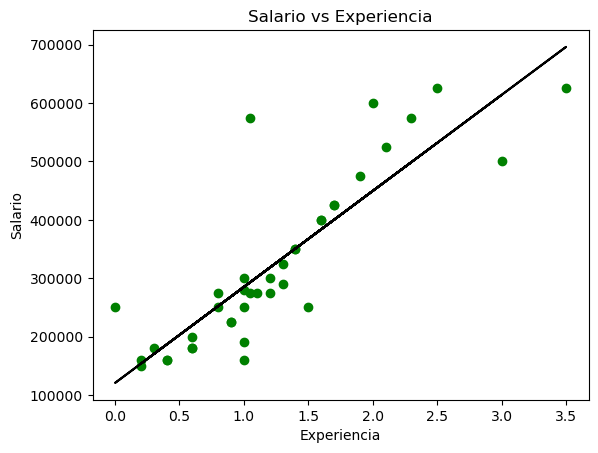

In [194]:
#Visualización de los datos de entrenamiento

viz_train = plt
viz_train.scatter(X_train, y_train, color = 'g')
viz_train.plot(X_train, regressor.predict(X_train), color = 'black')
viz_train.title('Salario vs Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
viz_train.show()

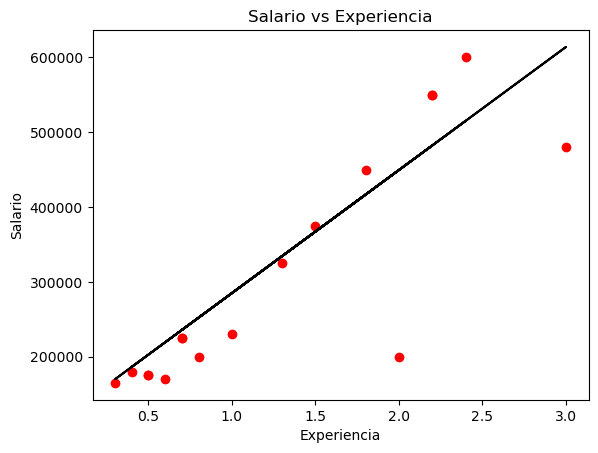

In [195]:
#Visualización de los datos de prueba
viz_test = plt
viz_test.scatter(X_test, y_test, color = 'red')
viz_test.plot(X_test, regressor.predict(X_test), color = 'black')
viz_test.title('Salario vs Experiencia')
viz_test.xlabel('Experiencia')
viz_test.ylabel('Salario')
viz_test.show()

In [196]:
y_pred = regressor.predict(X_test)
y_pred.round(0)

array([[482415.],
       [334424.],
       [613962.],
       [235763.],
       [515302.],
       [169989.],
       [235763.],
       [449528.],
       [186433.],
       [202876.],
       [202876.],
       [252207.],
       [416641.],
       [219320.],
       [367311.],
       [482415.],
       [285094.]])

In [197]:
y_test

,Salary(ARS)
45,550000.0
33,325000.0
40,480000.0
26,225000.0
11,600000.0
2,165000.0
32,225000.0
43,200000.0
46,180000.0
30,175000.0


In [198]:
"""
regressor.score(X_test, y_test)
calcula el coeficiente de determinación (R cuadrado) del modelo de regresión en base a los datos de
prueba (X_test, y_test).

El coeficiente de determinación es una medida de la proporción de la variación en la variable
dependiente que se puede explicar por el modelo de regresión.
El coeficiente de determinación varía entre 0 y 1, donde 0 indica que el modelo no explica ninguna
 variación en la variable dependiente y 1 indica que el modelo explica toda la variación en la variable dependiente.


"""
#Score del modelo en entrenamiento
regressor.score(X_train, y_train)




0.7338399488759946

In [199]:
#Score del modelo en testeo
regressor.score(X_test, y_test)

0.7244240588439759

In [200]:
#Input para ingresar la edad que tiene el usuario
age_experience = float(input('Cuantos años de experiencia tiene '))

#Predicción del salario que estaria ganando la persona segun la edad digitada.
#user_salary = regressor.predict(np.array([age_experience]).reshape(-1, 1))
user_salary = regressor.predict([[age_experience]])

#Se convierte la prediccion del salario en entero para no trabajar con decimales
user_salary = int(user_salary)
user_salary


c:\Users\ruiz7\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ruiz7\AppData\Local\Temp\ipykernel_4340\1876281805.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  user_salary = int(user_salary)


942831

In [201]:
[[age_experience]]

[[5.0]]